Decision Tree


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sb
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

In [2]:
ds=pd.DataFrame(pd.read_csv("E:\\Study\\AIDS\\DS\\ML\\Social_Network_Ads.csv"))
ds.drop(columns=["User ID","Gender"],inplace=True)
ds.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

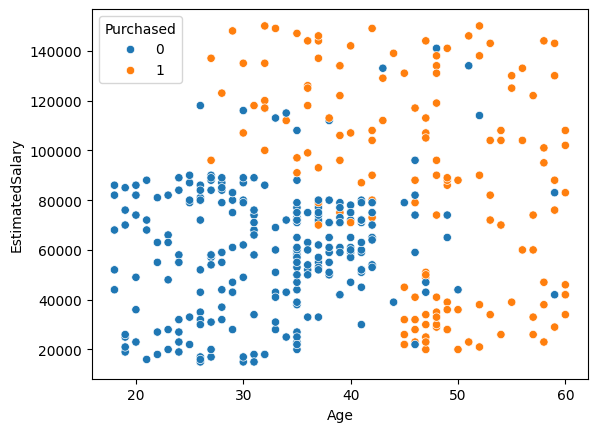

In [4]:
sb.scatterplot(data=ds,x=ds["Age"],y=ds["EstimatedSalary"],hue=ds["Purchased"])
mat.show()

In [5]:
x=ds.iloc[:,:-1]
y=ds["Purchased"]
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [6]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=50)

In [8]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [72]:
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [73]:
dt.score(x_test,y_test)

0.896875

In [74]:
dt.score(x_train,y_train)*100


93.75

Pruning- Saving the model from overfitting

In [75]:
for i in range(1,20):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train,y_train)
    print(dt1.score(x_test,y_test),dt1.score(x_train,y_train),i)


0.80625 0.9 1
0.896875 0.9375 2
0.875 0.95 3
0.8625 0.975 4
0.859375 0.9875 5
0.859375 1.0 6
0.859375 1.0 7
0.859375 1.0 8
0.859375 1.0 9
0.859375 1.0 10
0.859375 1.0 11
0.859375 1.0 12
0.859375 1.0 13
0.859375 1.0 14
0.859375 1.0 15
0.859375 1.0 16
0.859375 1.0 17
0.859375 1.0 18
0.859375 1.0 19


In [76]:
f1_score(y_test,dt.predict(x_test)),f1_score(y_train,dt.predict(x_train))

(0.8674698795180723, 0.8979591836734694)

In [77]:
dt.predict([[35,27000]])

c:\Users\huzef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

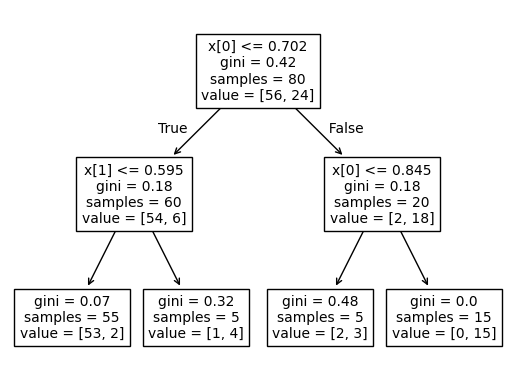

In [78]:
plot_tree(dt)
mat.show()

c:\Users\huzef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


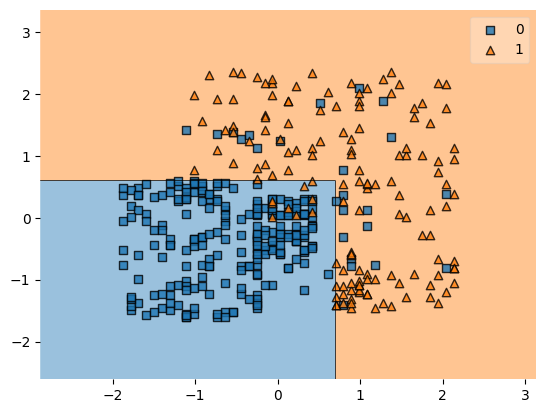

In [79]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
mat.show()

In [80]:
from sklearn.naive_bayes import GaussianNB


In [81]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [82]:
gnb.score(x_test,y_test)

0.875

In [83]:
gnb.score(x_train,y_train)

0.925

In [84]:
f1_score(y_test,gnb.predict(x_test)),f1_score(y_train,gnb.predict(x_train))

(0.8260869565217391, 0.8695652173913043)

c:\Users\huzef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<Axes: >

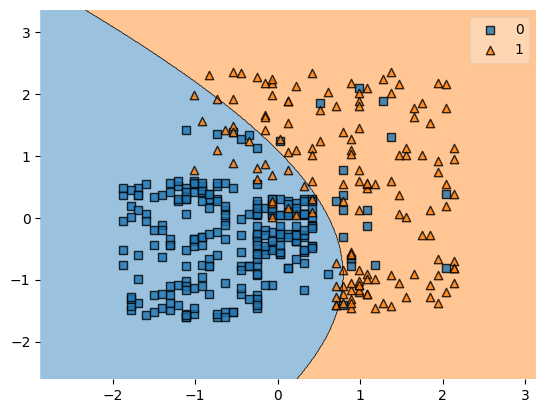

In [85]:
plot_decision_regions(x.to_numpy(), y.to_numpy(),clf=gnb)